# 중국 선수들 그래프 그리기
* 중간에 그래프 그리는 과정들을 자동화 시키는 코드들이 있습니다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('swimming_reference.csv', encoding = 'cp949')
data.head(3)

,Name,Event,Event(cat),Time,Age,Competition
0,Bao Ban,Men 50m Freestyle,50m Freestyle,23.33,30,The National Games
1,Bao Ban,Men 50m Freestyle,50m Freestyle,23.45,30,Chinese National Summer Championships (50m)
2,Bao Ban,Men 50m Freestyle,50m Freestyle,22.63,26,2017 National Games


In [5]:
data['Name'].value_counts()

Xiang Li         102
Yun Hao           92
Feiyi Cheng       56
Junyi He          49
Jigong Diao       42
Yujie Hou         34
Liwei Fei         34
Jinlong Hong      33
Bao Ban           33
Yifan Dong        33
Yuhui Jiang       32
Haiqi Jiang       30
Zhongjian Lai     26
Gong Cheng        23
Yunkun Huang      21
Zilong He         20
Shaoqing Ban      17
Haifeng Fu        12
Yu Cong           11
Juaqu Huang       10
Name: Name, dtype: int64

In [6]:
# 선수 분류기
def namer(name) :
    return data[data['Name'] == name]

In [7]:
# 대회별 분류기
def event_judge(player, event):
    return(player[player['Event'] == event])

In [8]:
# 시간 변환기
def time_changer(times):
    time_list = []
    for time in times:
        if len(time) <= 5:
            time = float(time)
        else:
            time = float(time.split(':')[0])*60 + float(time.split(':')[1])
        time_list.append(time)
    return(time_list)

In [9]:
data['Time'] = time_changer(data['Time'])

In [10]:
data.tail(3)

,Name,Event,Event(cat),Time,Age,Competition
707,Haiqi Jiang,Men 4x100m Freestyle Relay,4x100m Freestyle Relay,196.3,18,16th Asian Games 2010
708,Haiqi Jiang,Men 4x200m Freestyle Relay,4x200m Freestyle Relay,427.7,18,16th Asian Games 2010
709,Haiqi Jiang,Men 4x200m Freestyle Relay,4x200m Freestyle Relay,427.7,18,16th Asian Games 2010


# 중국 첫 번째 선수

In [11]:
c1 = namer('Xiang Li')
c1.head(3)

,Name,Event,Event(cat),Time,Age,Competition
557,Xiang Li,Men 50m Breaststroke,50m Breaststroke,27.52,24,Chinese National Championships (50m)
558,Xiang Li,Men 100m Breaststroke,100m Breaststroke,60.70,24,Chinese National Championships (50m)
559,Xiang Li,Men 100m Breaststroke,100m Breaststroke,61.20,24,Chinese National Championships (50m)


In [12]:
c1['Event'].value_counts()

Men 100m Breaststroke         25
Men 200m Breaststroke         18
Men 50m Breaststroke          16
Men 400m Medley               11
Men 1500m Freestyle            9
Men 200m Medley                7
Mixed 4x50m Medley Relay       5
Men 4x100m Medley Relay        3
Mixed 4x100m Medley Relay      2
Men 100m Butterfly             1
Men 200m Butterfly             1
Men 200m Backstroke            1
Men 100m Backstroke            1
Men 400m Freestyle             1
Men 4x200m Freestyle Relay     1
Name: Event, dtype: int64

In [13]:
c1_100_br = event_judge(c1, 'Men 100m Breaststroke')

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(c1_100_br[['Time']])
time_scaled = scaler.transform(c1_100_br[['Time']])
c1_100_br['time_scaled'] = time_scaled

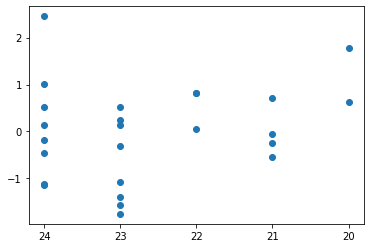

In [16]:
plt.scatter(x=c1_100_br['Age'] , y =c1_100_br['time_scaled'])

In [17]:
# 선수 정규화 자동화 코드
def automatic( player_name, competetion):
    new = event_judge(player_name, competetion)
    scaler.fit(new[['Time']])
    hey = scaler.transform(new[['Time']])
    new['time_scaled'] = hey*-1
    return new

In [18]:
c1_200_br = automatic( c1,'Men 200m Breaststroke' )
c1_200_br.head(3)

,Name,Event,Event(cat),Time,Age,Competition,time_scaled
561,Xiang Li,Men 200m Breaststroke,200m Breaststroke,138.4,24,Spring National CHN Swimming Championhips,-2.482262
564,Xiang Li,Men 200m Breaststroke,200m Breaststroke,133.2,24,FINA/airweave Swimming World Cup 2017,-0.074596
572,Xiang Li,Men 200m Breaststroke,200m Breaststroke,130.7,24,2017 National Games,1.082935


In [19]:
c1_50_br = automatic( c1,'Men 50m Breaststroke' )
c1_50_br.head(3)

,Name,Event,Event(cat),Time,Age,Competition,time_scaled
557,Xiang Li,Men 50m Breaststroke,50m Breaststroke,27.52,24,Chinese National Championships (50m),0.168073
560,Xiang Li,Men 50m Breaststroke,50m Breaststroke,27.90,24,Chinese National Championships (50m),-0.399641
568,Xiang Li,Men 50m Breaststroke,50m Breaststroke,26.74,24,FINA/airweave Swimming World Cup 2017,1.333380


In [20]:
c1_400_m = automatic( c1,'Men 400m Medley' )

In [21]:
c1_1500_f = automatic( c1,'Men 1500m Freestyle' )

In [22]:
c1_200_m = automatic( c1,'Men 200m Medley' )

In [23]:
c1_total = pd.concat([c1_200_br,c1_50_br,c1_400_m,c1_1500_f,c1_200_m])

In [24]:
c1_total = c1_total.sort_values(by = 'Age' , ascending = True)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [26]:
model_c1_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c1_lr.fit(c1_total[['Age']],y =c1_total[['time_scaled']])
print(model_c1_lr.steps[1][1].coef_)

[[ 6.72836269e+01 -5.50802734e+00  1.96425590e-01 -2.58097459e-03]]


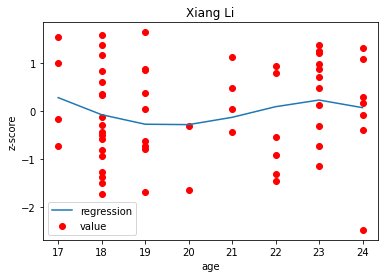

In [27]:
xx = np.linspace(10, 30, 100)
y_pred = model_c1_lr.predict(c1_total[['Age']])
plt.plot(c1_total['Age'], y_pred, label = 'regression')

plt.scatter(c1_total['Age'] , c1_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Xiang Li')


plt.show()

# 중국 2번째 선수

In [28]:
c2 = namer('Yun Hao')

In [29]:
c2['Event'].value_counts()

Men 200m Freestyle             16
Men 400m Freestyle             15
Men 200m Butterfly             11
Men 100m Butterfly              9
Men 1500m Freestyle             9
Men 4x200m Freestyle Relay      8
Men 100m Freestyle              7
Men 4x100m Freestyle Relay      4
Men 200m Medley                 4
Men 400m Medley                 2
Men 800m Freestyle              2
Mixed 4x50m Freestyle Relay     1
Mixed 4x50m Medley Relay        1
Men 4x50m Freestyle Relay       1
Men 4x100m Medley Relay         1
Men 100m Medley                 1
Name: Event, dtype: int64

In [30]:
c2_200_f = automatic( c2,'Men 200m Freestyle' )

In [31]:
c2_400_f = automatic( c2,'Men 400m Freestyle' )

In [32]:
c2_100_b = automatic( c2,'Men 100m Butterfly' )

In [33]:
c2_1500_f = automatic( c2,'Men 1500m Freestyle' )

In [34]:
c2_total = pd.concat([c2_200_f,c2_400_f,c2_100_b,c2_1500_f])
c2_total = c2_total.sort_values(by = 'Age' , ascending = True)

In [35]:
model_c2_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c2_lr.fit(c2_total[['Age']],y =c2_total[['time_scaled']])
print(model_c2_lr.steps[1][1].coef_)

[[-1.15034867e+02  8.77869456e+00 -2.95731255e-01  3.70644909e-03]]


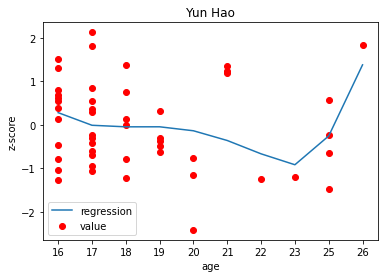

In [36]:
xx = np.linspace(10, 30, 100)
y_pred = model_c2_lr.predict(c2_total[['Age']])
plt.plot(c2_total['Age'], y_pred, label = 'regression')

plt.scatter(c2_total['Age'] , c2_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Yun Hao')


plt.show()

# 중국 3번째 선수

In [39]:
c3 = namer('Feiyi Cheng')

In [40]:
c3['Event'].value_counts()

Men 100m Backstroke         17
Men 50m Backstroke          16
Men 200m Backstroke         14
Men 4x100m Medley Relay      7
Mixed 4x50m Medley Relay     1
Men 100m Medley              1
Name: Event, dtype: int64

In [41]:
c3_100_b = automatic( c3,'Men 100m Backstroke' )

In [42]:
c3_50_b = automatic( c3,'Men 50m Backstroke' )

In [43]:
c3_200_b = automatic( c3,'Men 200m Backstroke' )

In [44]:
c3_total = pd.concat([c3_100_b,c3_50_b,c3_200_b])
c3_total = c3_total.sort_values(by = 'Age' , ascending = True)

In [45]:
model_c3_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c3_lr.fit(c3_total[['Age']],y =c3_total[['time_scaled']])
print(model_c3_lr.steps[1][1].coef_)

[[-2.87161936e+03  2.15607295e+02 -7.17189287e+00  8.91842706e-02]]


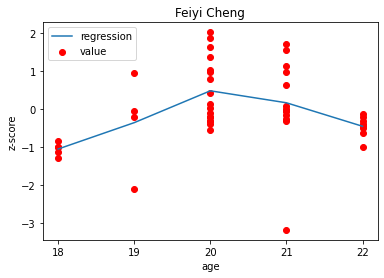

In [46]:
xx = np.linspace(10, 30, 100)
y_pred = model_c3_lr.predict(c3_total[['Age']])
plt.plot(c3_total['Age'], y_pred, label = 'regression')

plt.scatter(c3_total['Age'] , c3_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Feiyi Cheng')


plt.show()

# 중국 4번째 선수

In [47]:
c4 = namer('Junyi He')

In [48]:
c4['Event'].value_counts()

Men 100m Freestyle              17
Men 50m Freestyle                9
Men 200m Freestyle               9
Men 4x100m Freestyle Relay       4
Men 4x100m Medley Relay          3
Mixed 4x100m Freestyle Relay     3
Men 400m Freestyle               2
Men 4x50m Freestyle Relay        1
Men 1500m Freestyle              1
Name: Event, dtype: int64

In [50]:
c4_100_f = automatic( c4,'Men 100m Freestyle' )

In [51]:
c4_50_f = automatic( c4,'Men 50m Freestyle' )

In [52]:
c4_200_f = automatic( c4,'Men 200m Freestyle' )

In [53]:
c4_total = pd.concat([c4_100_f,c4_50_f,c4_200_f])
c4_total = c4_total.sort_values(by = 'Age' , ascending = True)

In [54]:
model_c4_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c4_lr.fit(c4_total[['Age']],y =c4_total[['time_scaled']])
print(model_c4_lr.steps[1][1].coef_)

[[-1.13293746e+03  7.93200464e+01 -2.45506265e+00  2.83473000e-02]]


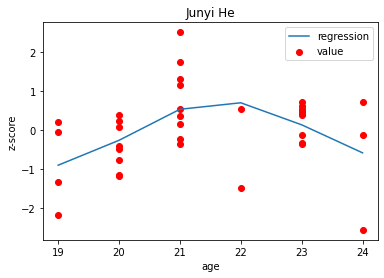

In [55]:
xx = np.linspace(10, 30, 100)
y_pred = model_c4_lr.predict(c4_total[['Age']])
plt.plot(c4_total['Age'], y_pred, label = 'regression')

plt.scatter(c4_total['Age'] , c4_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Junyi He')


plt.show()

# 중국 5번째 선수

In [56]:
c5 = namer('Jigong Diao')

In [57]:
c5['Event'].value_counts()

Men 200m Backstroke          15
Men 100m Backstroke          13
Men 200m Freestyle            5
Men 400m Freestyle            4
Men 50m Backstroke            2
Mixed 4x100m Medley Relay     1
Men 100m Freestyle            1
Men 50m Freestyle             1
Name: Event, dtype: int64

In [58]:
c5_200_b = automatic( c5,'Men 200m Backstroke' )

In [59]:
c5_100_b = automatic( c5,'Men 100m Backstroke' )

In [60]:
c5_total = pd.concat([c5_200_b,c5_100_b])
c5_total = c5_total.sort_values(by = 'Age' , ascending = True)

In [61]:
model_c5_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c5_lr.fit(c5_total[['Age']],y =c5_total[['time_scaled']])
print(model_c5_lr.steps[1][1].coef_)

[[-2.76615343e-01 -4.40629286e+00  2.41812233e-01 -3.72680753e-03]]


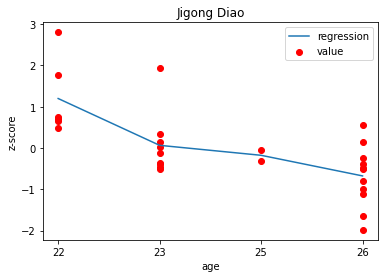

In [62]:
xx = np.linspace(10, 30, 100)
y_pred = model_c5_lr.predict(c5_total[['Age']])
plt.plot(c5_total['Age'], y_pred, label = 'regression')

plt.scatter(c5_total['Age'] , c5_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Jigong Diao')


plt.show()

# 중국 6번째 선수

In [63]:
c6 = namer('Yujie Hou')

In [64]:
c6['Event'].value_counts()

Men 100m Freestyle             12
Men 50m Freestyle               5
Men 200m Freestyle              5
Men 4x100m Freestyle Relay      4
Mixed 4x50m Freestyle Relay     2
Men 400m Freestyle              2
Men 4x100m Medley Relay         1
Men 4x50m Freestyle Relay       1
Men 4x200m Freestyle Relay      1
Men 100m Butterfly              1
Name: Event, dtype: int64

In [65]:
c6_100_f = automatic( c6,'Men 100m Freestyle' )

In [66]:
c6_total = c6_100_f.sort_values(by = 'Age' , ascending = True)

In [67]:
model_c6_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c6_lr.fit(c6_total[['Age']],y =c6_total[['time_scaled']])
print(model_c6_lr.steps[1][1].coef_)

[[ 1.11368408e+02 -9.07751164e+00  3.30586013e-01 -4.51706341e-03]]


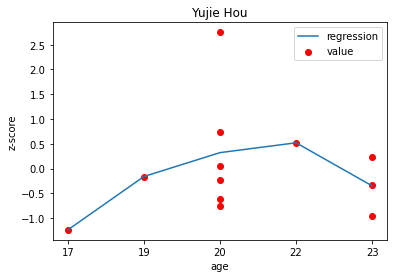

In [68]:
xx = np.linspace(10, 30, 100)
y_pred = model_c6_lr.predict(c6_total[['Age']])
plt.plot(c6_total['Age'], y_pred, label = 'regression')

plt.scatter(c6_total['Age'] , c6_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Yujie Hou')


plt.show()

# 중국 7번째 선수

In [69]:
c7 = namer('Liwei Fei')

In [70]:
c7['Event'].value_counts()

Men 400m Freestyle            10
Men 1500m Freestyle            8
Men 200m Freestyle             7
Men 800m Freestyle             6
Men 50m Freestyle              2
Men 4x200m Freestyle Relay     1
Name: Event, dtype: int64

In [71]:
c7_400_f = automatic( c7,'Men 400m Freestyle' )

In [72]:
c7_1500_f = automatic( c7,'Men 1500m Freestyle' )

In [73]:
c7_200_f = automatic( c7,'Men 200m Freestyle' )

In [74]:
c7_total = pd.concat([c7_400_f,c7_1500_f,c7_200_f])
c7_total = c7_total.sort_values(by = 'Age' , ascending = True)

In [75]:
model_c7_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c7_lr.fit(c7_total[['Age']],y =c7_total[['time_scaled']])
print(model_c7_lr.steps[1][1].coef_)

[[ 3.47265974e+03 -3.25984165e+02  1.35558895e+01 -2.10683591e-01]]


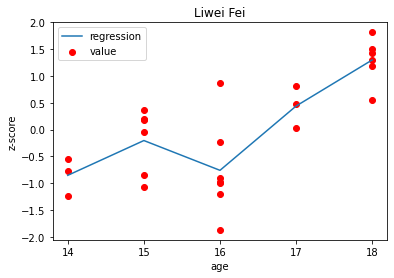

In [76]:
xx = np.linspace(10, 30, 100)
y_pred = model_c7_lr.predict(c7_total[['Age']])
plt.plot(c7_total['Age'], y_pred, label = 'regression')

plt.scatter(c7_total['Age'] , c7_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Liwei Fei')


plt.show()

# 중국 8번째 선수

In [82]:
c8 = namer('Jinlong Hong')

In [83]:
c8['Event'].value_counts()

Men 200m Freestyle             12
Men 400m Freestyle              9
Men 100m Freestyle              7
Men 50m Freestyle               3
Men 4x200m Freestyle Relay      1
Mixed 4x50m Freestyle Relay     1
Name: Event, dtype: int64

In [84]:
c8_200_f = automatic( c8,'Men 200m Freestyle' )

In [85]:
c8_400_f = automatic( c8,'Men 400m Freestyle' )

In [86]:
c8_100_f = automatic( c8,'Men 100m Freestyle' )

In [87]:
c8_total = pd.concat([c8_200_f,c8_400_f,c8_100_f])
c8_total = c8_total.sort_values(by = 'Age' , ascending = True)

In [88]:
model_c8_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c8_lr.fit(c8_total[['Age']],y =c8_total[['time_scaled']])
print(model_c8_lr.steps[1][1].coef_)

[[ 9.92334328e+01 -6.75549878e+00  2.02678171e-01 -2.26807250e-03]]


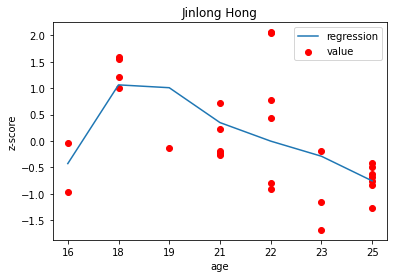

In [89]:
xx = np.linspace(10, 30, 100)
y_pred = model_c8_lr.predict(c8_total[['Age']])
plt.plot(c8_total['Age'], y_pred, label = 'regression')

plt.scatter(c8_total['Age'] , c8_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Jinlong Hong')


plt.show()

# 중국 9번째 선수

In [90]:
c9 = namer('Bao Ban')

In [91]:
c9['Event'].value_counts()

Men 50m Freestyle             13
Men 100m Freestyle             8
Men 50m Butterfly              4
Men 4x100m Freestyle Relay     3
Men 4x200m Freestyle Relay     2
Men 200m Freestyle             2
Men 4x100m Medley Relay        1
Name: Event, dtype: int64

In [92]:
c9_50_f = automatic( c9,'Men 50m Freestyle' )

In [93]:
c9_100_f = automatic( c9,'Men 100m Freestyle' )

In [94]:
c9_total = pd.concat([c9_50_f,c9_100_f])
c9_total = c9_total.sort_values(by = 'Age' , ascending = True)

In [95]:
model_c9_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c9_lr.fit(c9_total[['Age']],y =c9_total[['time_scaled']])
print(model_c9_lr.steps[1][1].coef_)

[[ 1.30828130e+02 -8.42588797e+00  2.39092699e-01 -2.52325174e-03]]


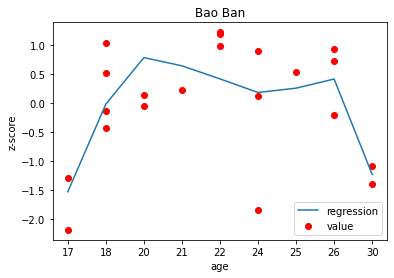

In [96]:
xx = np.linspace(10, 30, 100)
y_pred = model_c9_lr.predict(c9_total[['Age']])
plt.plot(c9_total['Age'], y_pred, label = 'regression')

plt.scatter(c9_total['Age'] , c9_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Bao Ban')


plt.show()

# 중국 10번째 선수

In [97]:
c10 = namer('Yifan Dong')

In [98]:
c10['Event'].value_counts()

Men 100m Breaststroke          13
Men 200m Breaststroke           8
Men 200m Medley                 3
Men 50m Freestyle               2
Men 50m Breaststroke            2
Mixed 4x50m Medley Relay        2
Men 4x100m Medley Relay         1
Men 100m Medley                 1
Mixed 4x50m Freestyle Relay     1
Name: Event, dtype: int64

In [99]:
c10_100_br= automatic( c10,'Men 100m Breaststroke' )

In [100]:
c10_200_br= automatic( c10,'Men 200m Breaststroke' )

In [101]:
c10_total = pd.concat([c10_100_br,c10_200_br])
c10_total = c10_total.sort_values(by = 'Age' , ascending = True)

In [102]:
model_c10_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

model_c10_lr.fit(c10_total[['Age']],y =c10_total[['time_scaled']])
print(model_c10_lr.steps[1][1].coef_)

[[-2.19879575e+03  1.78389298e+02 -6.42031864e+00  8.64994535e-02]]


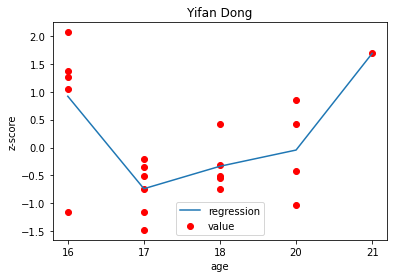

In [103]:
xx = np.linspace(10, 30, 100)
y_pred = model_c10_lr.predict(c10_total[['Age']])
plt.plot(c10_total['Age'], y_pred, label = 'regression')

plt.scatter(c10_total['Age'] , c10_total['time_scaled'], label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Yifan Dong')


plt.show()

# 중국 11번째 선수